In [1]:
#find where we are
%pwd

# UCI Machine Learning - Mini Project

Class workshop using: https://archive.ics.uci.edu/ml/datasets/car+evaluation

In [2]:
import pandas as pd
import psycopg2
import pandas as pd
import pandas.io.sql as pd_sql
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as mn
import os
import yellowbrick 

In [3]:
names = [
    'buying',
    'maint',
    'doors',
    'persons',
    'lug_boot',
    'safety',
    'acceptability'
]

df = pd.read_csv("cardata.csv")
df.columns = names
df.head(10)

,buying,maint,doors,persons,lug_boot,safety,acceptability
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
5,vhigh,vhigh,2,2,big,low,unacc
6,vhigh,vhigh,2,2,big,med,unacc
7,vhigh,vhigh,2,2,big,high,unacc
8,vhigh,vhigh,2,4,small,low,unacc
9,vhigh,vhigh,2,4,small,med,unacc


In [4]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,acceptability
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,5more,4,big,high,unacc
freq,432,432,432,576,576,576,1209


In [5]:
df.dtypes

buying           object
maint            object
doors            object
persons          object
lug_boot         object
safety           object
acceptability    object
dtype: object

In [6]:
df['acceptability'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: acceptability, dtype: int64

In [7]:
df['buying'].value_counts()

high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64

In [8]:
df['maint'].value_counts()

high     432
low      432
med      432
vhigh    431
Name: maint, dtype: int64

In [9]:
df['lug_boot'].value_counts()

big      576
med      576
small    575
Name: lug_boot, dtype: int64

In [10]:
df['persons'].value_counts()

4       576
more    576
2       575
Name: persons, dtype: int64

In [11]:
df['safety'].value_counts()

high    576
med     576
low     575
Name: safety, dtype: int64

In [12]:
df['doors'].value_counts()

5more    432
3        432
4        432
2        431
Name: doors, dtype: int64

In [13]:
#check if any NANs in data
df.isna().any()

buying           False
maint            False
doors            False
persons          False
lug_boot         False
safety           False
acceptability    False
dtype: bool

In [14]:
#drop columns with null values
df.dropna(subset=['buying', 'maint', 'lug_boot', 'safety'], inplace=True)

In [15]:
#set color scheme
sns.set_palette("cubehelix")

In [16]:
#mapping values
df['buying'] = df['buying'].map({'low': 0,'med': 1, 'high': 2,'vhigh': 3})
df['maint'] = df['maint'].map({'low': 0,'med': 1, 'high': 2,'vhigh': 3})
df['persons'] = df['persons'].map({'2': 0,'4': 1, 'more': 2})
df['lug_boot'] = df['lug_boot'].map({'small': 0,'med': 1, 'big': 2})
df['doors'] = df['doors'].map({'2': 0,'3': 1, '4': 2,'5more': 3})
df['safety'] = df['safety'].map({'low': 0,'med': 1, 'high': 2})

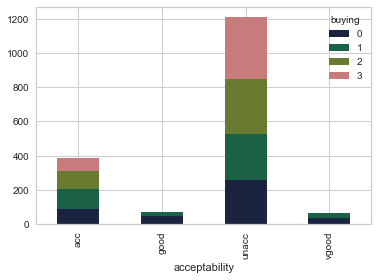

In [17]:
#check buying vs. acceptability
df.groupby(['acceptability','buying']).size().unstack().plot(kind='bar',stacked=True)
plt.show()

In [18]:
features = ['buying', 'maint','doors', 'persons', 'lug_boot', 'safety']
target   = ['acceptability']

X = df[features]
y = df[target]

//anaconda3/lib/python3.7/site-packages/yellowbrick/base.py:359: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y, **kwargs)


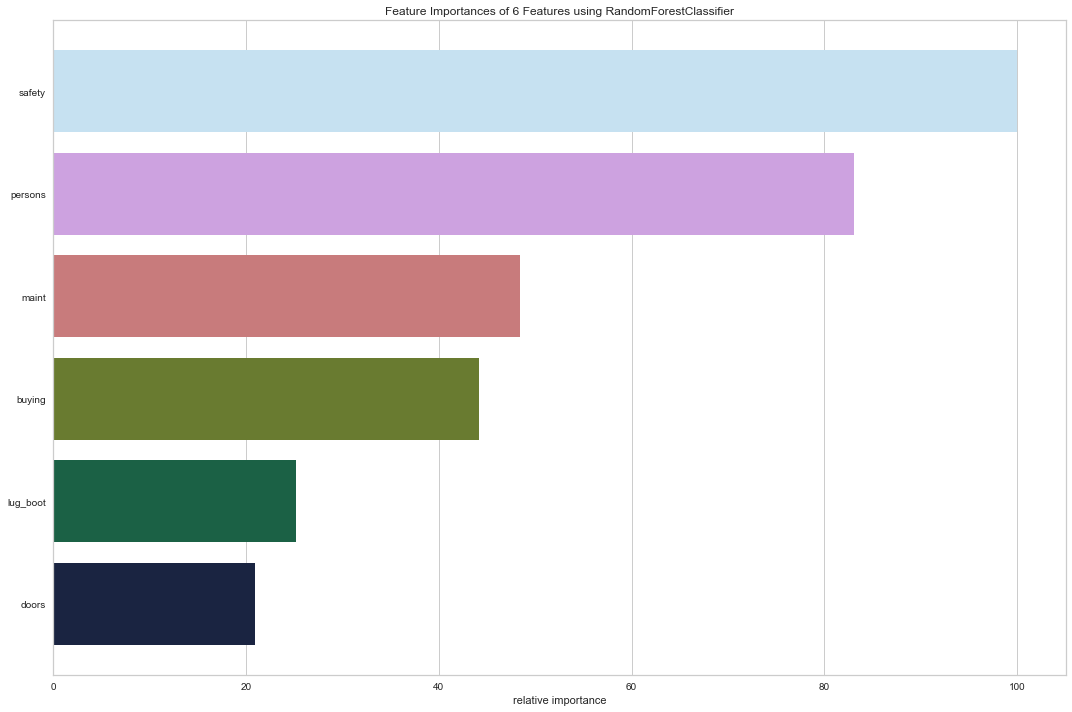

In [19]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(1080, 720))

viz.fit(X, y)
# Note: the FeatureImportances visualizer is a model visualizer,
# not a feature visualizer, so it doesn't have a transform method!
viz.show()

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [21]:
# Start Decsison Tree Modelling
from sklearn import tree
dt=tree.DecisionTreeClassifier(criterion="entropy")
dt.fit(X_train,y_train)
y_predict = dt.predict(X_test)

In [22]:
# Print the Accuracy 
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_predict))

Accuracy:  0.9768518518518519


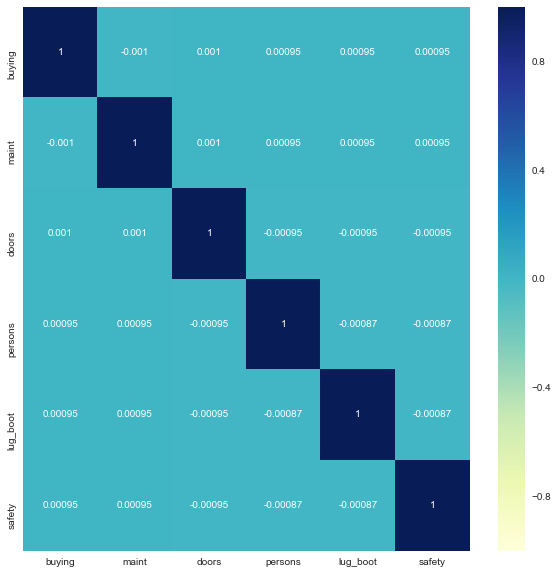

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),vmin=-1,cmap='YlGnBu',annot=True)
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
# Initialize our algorithm
# lr = LogisticRegression(random_state=1, solver='liblinear')
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [25]:
# Print the Accuracy of Logistic Regression
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.7893518518518519


//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


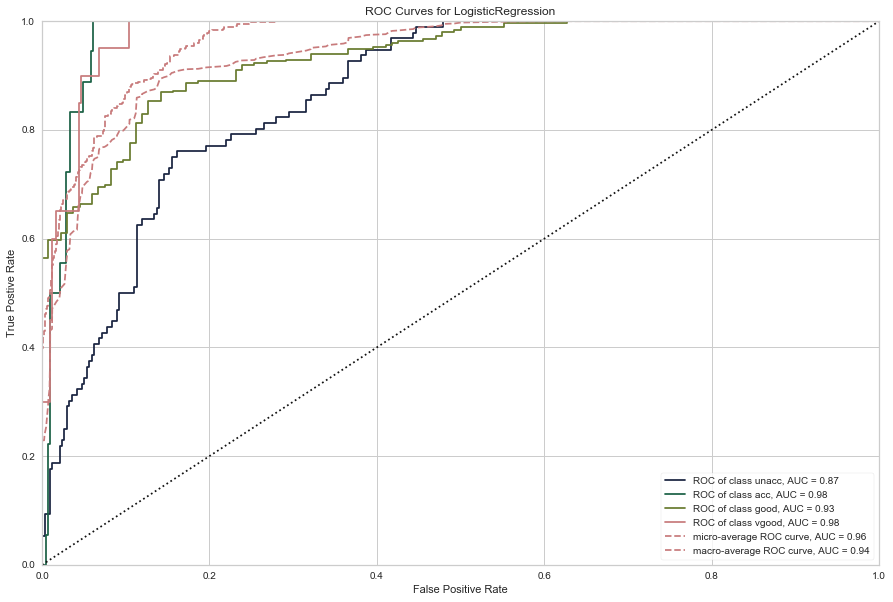

<Figure size 1440x1440 with 0 Axes>

In [26]:
# ROCAUC 
from yellowbrick.classifier import ROCAUC
# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["unacc","acc","good","vgood"], size=(1080, 720))


visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
plt.figure(figsize=(20,20))
visualizer.show()                       # Finalize and show the figure

In [27]:
from sklearn.ensemble import RandomForestClassifier
regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# Print the Accuracy
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.9837962962962963


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         acc       0.96      0.95      0.95        96
        good       1.00      0.78      0.88        18
       unacc       0.98      1.00      0.99       298
       vgood       1.00      1.00      1.00        20

   micro avg       0.98      0.98      0.98       432
   macro avg       0.98      0.93      0.95       432
weighted avg       0.98      0.98      0.98       432

